<a href="https://colab.research.google.com/github/Folkas/folkas/blob/gh-pages/135.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 1: Data Science Fundamentals

## Sprint 3: Intro to Modeling

## Spotify Challenge

<div><img style="width: 100%; " src="https://upload.wikimedia.org/wikipedia/commons/1/14/Iyyaka_Nastain_QR-Code_Spotify_Black.png" /></div>

## Background

For our sprint's project, we'll analyze top 50 most listened songs in the world on Spotify. The dataset contains several music (sound) variables about the songs, which we'll use to perform modeling with.

---------

## How to start?

Download the dataset [from Kaggle](https://www.kaggle.com/leonardopena/top50spotify2019) and read it. You should start by performing basic EDA on it. Afterwards, follow the requirements.

In [ ]:
#importing dataset into colab
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("top50.csv", encoding='latin-1')


## Concepts to explore

We will use dimensionality reduction, do some clustering with K-means and perform linear regression.

## Requirements

* Perform basic EDA.


In [ ]:
df.shape

(50, 14)

In [ ]:
#dropping Unnamed: 0 column (duplicates the index values)
df = df.drop(['Unnamed: 0'], axis=1)
#changing column names
df.columns = [x.lower() for x in df.columns.str.replace(".", "_").str.replace(" ", "_")]
df.head()

,track_name,artist_name,genre,beats_per_minute,energy,danceability,loudness__db__,liveness,valence_,length_,acousticness__,speechiness_,popularity
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [ ]:
#checking for null values
df.isnull().any()

track_name          False
artist_name         False
genre               False
beats_per_minute    False
energy              False
danceability        False
loudness__db__      False
liveness            False
valence_            False
length_             False
acousticness__      False
speechiness_        False
popularity          False
dtype: bool

In [ ]:
#exploring the dataset
df.genre.value_counts()

dance pop           8
pop                 7
latin               5
edm                 3
canadian hip hop    3
reggaeton flow      2
brostep             2
reggaeton           2
electropop          2
country rap         2
dfw rap             2
canadian pop        2
panamanian pop      2
escape room         1
pop house           1
r&b en espanol      1
boy band            1
australian pop      1
trap music          1
big room            1
atl hip hop         1
Name: genre, dtype: int64

Text(0.5, 1.0, 'Correlation Heatmap')

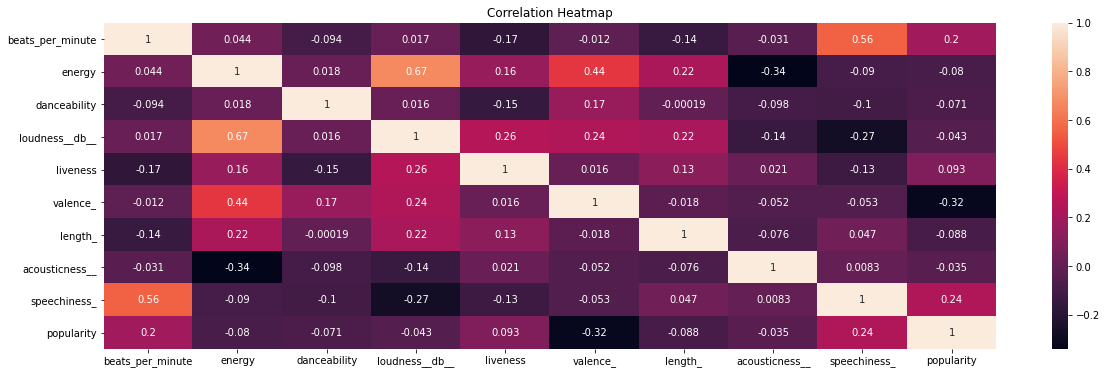

In [ ]:
#visualizing correlation among song features using heatmap
plt.figure(figsize=(20, 6))
sns.heatmap(df.loc[:, "beats_per_minute":"popularity"].corr(), annot=True).set_title('Correlation Heatmap')

* **Perform dimensionality reduction on song features, verify data separability by `Genre` (PCA and/or t-SNE).**

#PCA

In [ ]:
#slicing df dataset so that only columns with song features are left
df1 = df.loc[:, "beats_per_minute":"popularity"]

In [ ]:
#performing dimensionality reduction using PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
songs_pca = pca.fit_transform(df1)
songs_pca.shape

(50, 2)

In [ ]:
#checking how much initial variance has been preserved
pca.explained_variance_ratio_

array([0.40236078, 0.24278588, 0.14512957, 0.09203339, 0.04182637,
       0.02872418, 0.02434067, 0.01832356, 0.00400847, 0.00046714])

By reducing the number of dimensions to 2 for data visualization, I can see that reducing dimensionality preserves **64%** of features' variance. NB: it is recommended to reduce dimensionality so that **95%** of the dataset's variance is preserved. To find the minimum number of principal components preserving 95% of variance, I can use the cumsum formula below and plot it.

Text(0, 0.5, 'Explained variance')

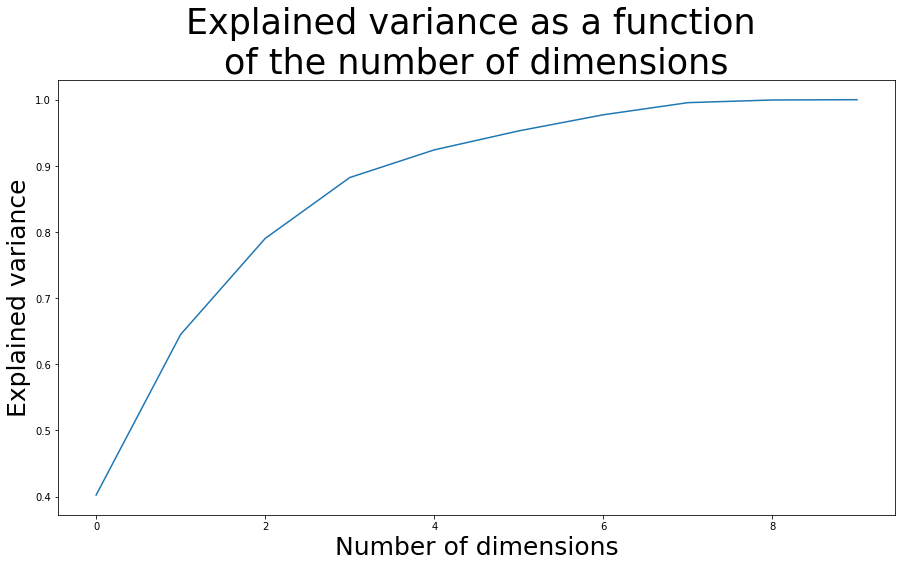

In [ ]:
pca = PCA()
pca.fit(df1)
cumsum = np.cumsum(pca.explained_variance_ratio_)

#plotting the explained variance
plt.figure(figsize=(15,8))
sns.lineplot(x=range(len(cumsum)), y=cumsum).set_title("Explained variance as a function \nof the number of dimensions", size=35)
plt.xlabel("Number of dimensions", size=25)
plt.ylabel("Explained variance", size=25)

As we can see, 95% of variance is preserved when the number of dimensions is 5.

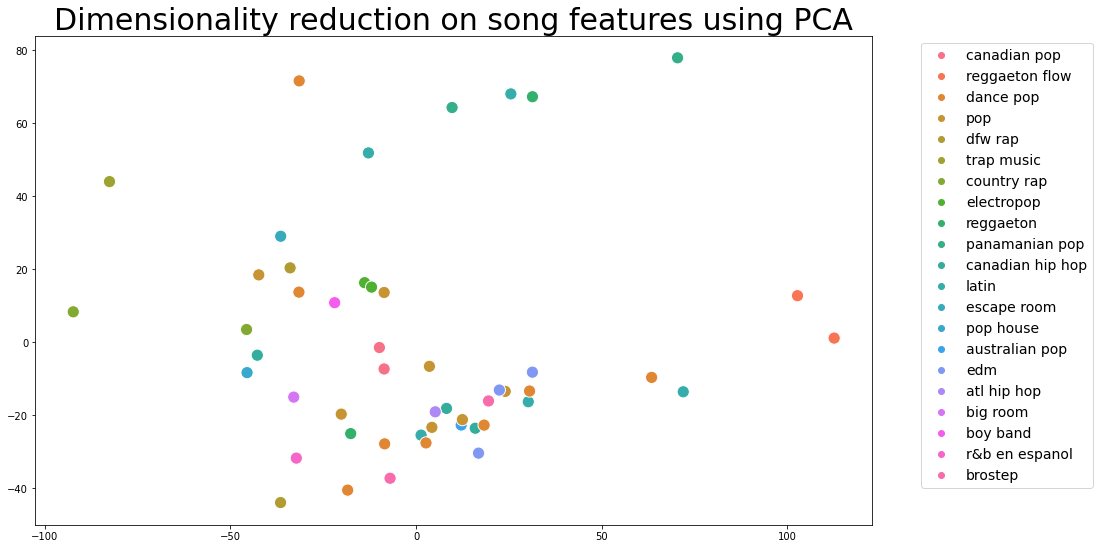

In [ ]:
#visualizing dimensionality reduction 
plt.figure(figsize=(15,9))

#verifying datas separability by genre
sns.scatterplot(x=songs_pca[:, 0], y=songs_pca[:, 1], hue=df.genre, s=150).set_title("Dimensionality reduction on song features using PCA", size=30)
plt.legend(bbox_to_anchor=(1.05, 1),fontsize=14)

#t-SNE

In [ ]:
#performing dimensionality reduction using t-SNE method
from sklearn.manifold import TSNE
songs_tsne = TSNE(n_components=2).fit_transform(df1)


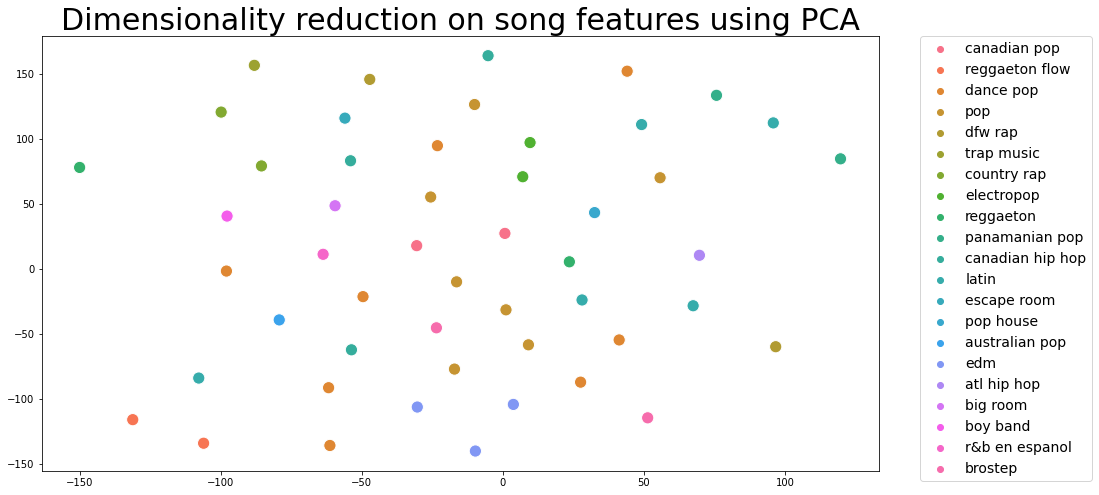

In [ ]:
#plotting dimensionality reduction
plt.figure(figsize=(15,8))
#verifying datas separability by genre
sns.scatterplot(x=songs_tsne[:, 0], y=songs_tsne[:, 1], hue=df.genre, s=150).set_title("Dimensionality reduction on song features using PCA", size=30) 
plt.legend(bbox_to_anchor=(1.05, 1), fontsize=14, borderaxespad=0.)

* **Infer `Genre` using song features with linear regression.**


In [ ]:
#importing package
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [ ]:
#converting genre variable into numerical categories
df.genre = pd.Categorical(df.genre)
df["genre_t"] = df.genre.cat.codes
df[["genre", "genre_t"]] #each genre has an assigned numerical category
one hot encoding

,genre,genre_t
0,canadian pop,6
1,reggaeton flow,19
2,dance pop,8
3,pop,15
4,dfw rap,9
5,pop,15
6,trap music,20
7,pop,15
8,country rap,7
9,electropop,11


In [ ]:
#Using OneHotEncoder to convert genres from DV into dummy variables
Y1 = df.loc[:, "genre"]
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder
data = asarray(Y1)
data = data.reshape(-1, 1)
encoder = OneHotEncoder(sparse=False)
Y2 = encoder.fit_transform(data)
Y2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#estimating linear regression for dummy DVs
reg.fit(X, Y2)
reg.coef_
# coeff_df = pd.DataFrame(reg.coef_, X.columns, columns=['Coefficient'])
# coeff_df

array([[-8.14109212e-04,  1.04862932e-03,  1.63764795e-03,
        -4.24642636e-03,  7.79424648e-05, -1.95805278e-03,
        -2.37885916e-04, -1.05604178e-03,  1.74330419e-03,
        -1.37262519e-03],
       [-3.40605224e-04,  1.53361818e-03,  2.18138366e-03,
        -3.58360227e-03,  7.76104594e-04, -7.33537165e-04,
         1.62178402e-05,  3.00848939e-03,  7.81569840e-04,
        -4.70618716e-03],
       [ 8.73289763e-05,  4.68954292e-03, -3.41649271e-04,
        -2.39645360e-02,  9.63573793e-05, -1.72511012e-03,
        -5.68456516e-04,  3.97464595e-04, -1.99358616e-03,
         1.13142537e-04],
       [ 9.49054938e-04, -6.02676858e-04,  1.18987304e-03,
        -1.97745384e-03,  3.33527769e-04,  1.27446950e-03,
        -1.67492449e-04, -1.08222589e-03, -1.75162258e-03,
        -6.14501623e-03],
       [-1.35088753e-03, -3.85496501e-03, -6.99538708e-04,
         4.43089351e-02,  6.22600352e-03,  8.02736638e-05,
        -7.57929298e-04, -1.67771914e-03,  2.35831099e-03,
        -9.

In [ ]:
#creating X and Y values for estimation for numerical categorical variables
X = df.loc[:, "beats_per_minute":"popularity"]
Y = df.loc[:, "genre_t"]

In [ ]:
#estimating linear regression for numerical categorical DVs
reg.fit(X, Y)
coeff_df = pd.DataFrame(reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
beats_per_minute,0.009019
energy,0.070474
danceability,-0.038706
loudness__db__,-0.055032
liveness,-0.129004
valence_,0.046292
length_,0.036461
acousticness__,0.006689
speechiness_,0.051678
popularity,0.372392


In [ ]:
df["predicted"] = reg.predict(X)
df[["genre", "genre_t", "predicted"]]
#convert predictions into class - accuracy score
#when treating as regression - r2, mean squarred error

,genre,genre_t,predicted
0,canadian pop,6,7.357444
1,reggaeton flow,19,17.432401
2,dance pop,8,14.125260
3,pop,15,11.236769
4,dfw rap,9,11.404271
5,pop,15,11.220556
6,trap music,20,10.304085
7,pop,15,12.277596
8,country rap,7,8.769307
9,electropop,11,14.114311


* **Cluster songs by features. Generate lists of 5 of similar songs. Verify their similarity by actually listening to some of cluster items on Youtube / Spotify / any other streaming platform.**

In [ ]:
from sklearn.cluster import KMeans
#Elbow method to select the right n of clusters
#selecting n of clusters
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df1)
    distortions.append(kmeanModel.inertia_)

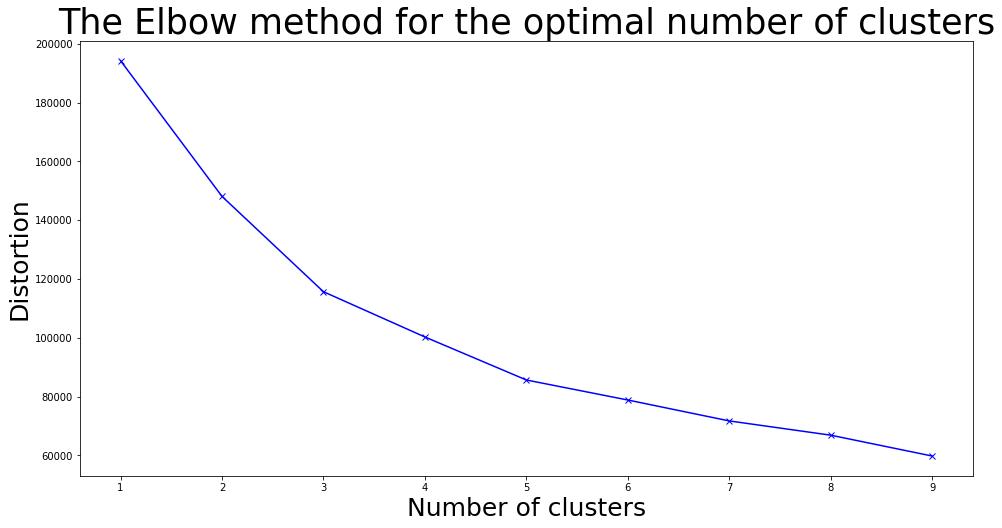

In [ ]:
#plotting the distortions of K-means for Elbow method
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters', size=25)
plt.ylabel('Distortion', size=25)
plt.title('The Elbow method for the optimal number of clusters', size=35)
plt.show()

In order to choose the right number of clusters, I will use the Elbow method. The graph above shows how the distortion changes as we increase the number of clusters. The distortion, or inertia, drops sharply until x=4 and then levels off. Therefore, I conclude that **the optimal number of clusters to run a K-Means algorithm is 4.**

In [ ]:
#running KMeans algorithm for 4 clusters
clusterer = KMeans(n_clusters=5)
clusterer.fit(df1)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
#cluster_centers_ method provides the coordinates of each centroid
centroids = clusterer.cluster_centers_
centroids

array([[ 87.65166655,  -2.37138503],
       [-38.76497415,  11.84870221],
       [ 15.42307802,  66.82635807],
       [  3.82940399, -21.4367092 ]])

In [ ]:
#using predict method to assign each song to a cluster
y_kmeans = clusterer.predict(df1)
y_kmeans


array([4, 0, 3, 2, 1, 4, 1, 2, 1, 1, 3, 2, 1, 3, 2, 2, 3, 4, 1, 1, 1, 1,
       0, 0, 1, 4, 2, 2, 4, 4, 2, 1, 4, 2, 2, 1, 3, 1, 4, 4, 2, 4, 2, 1,
       4, 2, 3, 4, 2, 4], dtype=int32)

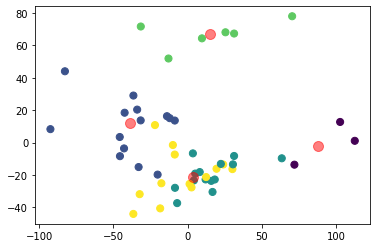

In [ ]:
#plotting clusters
plt.scatter(songs_pca[:, 0], songs_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')
#plotting centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, alpha=0.5)

In [ ]:
#sorting songs by the cluster to which they belong
df["clusters"] = y_kmeans
df2 = df[["track_name", "artist_name", "genre", "clusters"]].sort_values(by=["clusters"])
df2


,track_name,artist_name,genre,clusters
1,China,Anuel AA,reggaeton flow,0
23,Soltera - Remix,Lunay,latin,0
22,No Me Conoce - Remix,Jhay Cortez,reggaeton flow,0
24,bad guy (with Justin Bieber),Billie Eilish,electropop,1
37,Antisocial (with Travis Scott),Ed Sheeran,pop,1
35,Summer Days (feat. Macklemore & Patrick Stump ...,Martin Garrix,big room,1
31,7 rings,Ariana Grande,dance pop,1
43,Talk,Khalid,pop,1
21,Panini,Lil Nas X,country rap,1
20,Piece Of Your Heart,MEDUZA,pop house,1


In [ ]:
#generating a list of 5 similar songs for each cluster

cluster_1 = df2.loc[df2.clusters==0] #predominantly pop songs
cluster_2 = df2.loc[df2.clusters==1].sample(n=5, random_state=1) #also pop
cluster_3 = df2.loc[df2.clusters==2].sample(n=5, random_state=2)
cluster_4 = df2.loc[df2.clusters==3].sample(n=5, random_state=2) #latin songs
cluster_4 = df2.loc[df2.clusters==4].sample(n=5, random_state=2)
cluster_4

,track_name,artist_name,genre,clusters
38,Sucker,Jonas Brothers,boy band,4
44,Con Altura,ROSALÍA,r&b en espanol,4
5,I Don't Care (with Justin Bieber),Ed Sheeran,pop,4
32,0.958333333333333,Maluma,reggaeton,4
0,Señorita,Shawn Mendes,canadian pop,4


In [ ]:
df.iloc[[11, 0, 39, 17, 25], :]

,track_name,artist_name,genre,beats_per_minute,energy,danceability,loudness__db__,liveness,valence_,length_,acousticness__,speechiness_,popularity,genre_t,predicted,clusters
11,Loco Contigo (feat. J. Balvin & Tyga),DJ Snake,dance pop,96,71,82,-4,15,38,185,28,7,86,8,8.092732,0
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79,6,7.357444,0
39,"fuck, i'm lonely (with Anne-Marie) - from 13 ...",Lauv,dance pop,95,56,81,-6,6,68,199,48,7,78,8,7.390274,0
17,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,dfw rap,90,48,76,-6,7,91,158,56,5,91,9,11.206973,0
25,If I Can't Have You,Shawn Mendes,canadian pop,124,82,69,-4,13,87,191,49,6,70,6,6.499268,0


## Evaluation Criteria

- Code quality
- Adherence to the requirements
- Correctness of applied methods